In [15]:
# Importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [16]:
# Reading through the file path

df = pd.read_csv("CardioGoodFitness-1.csv")

df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


### Exploratory Data Analysis

In [17]:
# Sampling the data

df.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,TM798,25,Male,20,Partnered,4,5,74701,170
138,TM498,45,Male,16,Partnered,2,2,54576,42
5,TM195,20,Female,14,Partnered,3,3,32973,66
76,TM195,44,Female,16,Single,3,4,57987,75
99,TM498,25,Male,16,Partnered,2,2,52302,42


In [18]:
# Checking the shape of the dataset

df.shape

(180, 9)

In [19]:
# Checking the data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [20]:
# Examine the columns of the data

df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [21]:
# To explicitly show missing values

df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [22]:
# To check for duplicate values

df.duplicated().sum()

0

In [23]:
# To perform a simple descriptive statistics which gives stats for the numerical and categorical data columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [26]:
# Display the categories in the categorical column

cols = ["Product", "Gender", "Education", "MaritalStatus", "Fitness"]

for col in cols:
    print(df[col].value_counts())
    print("_" * 80)

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64
________________________________________________________________________________
Male      104
Female     76
Name: Gender, dtype: int64
________________________________________________________________________________
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64
________________________________________________________________________________
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
________________________________________________________________________________
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64
________________________________________________________________________________


In [28]:
# To check for empty values as they do not appear as null values

for col in df.columns:
    print(f'{col}:\n')
    print(f'{df[col].unique()}')
    print("_" * 80)

Product:

['TM195' 'TM498' 'TM798']
________________________________________________________________________________
Age:

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
________________________________________________________________________________
Gender:

['Male' 'Female']
________________________________________________________________________________
Education:

[14 15 12 13 16 18 20 21]
________________________________________________________________________________
MaritalStatus:

['Single' 'Partnered']
________________________________________________________________________________
Usage:

[3 2 4 5 6 7]
________________________________________________________________________________
Fitness:

[4 3 2 1 5]
________________________________________________________________________________
Income:

[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302 

#### Unique Values

In [29]:
np.unique(df["Product"].tolist())

array(['TM195', 'TM498', 'TM798'], dtype='<U5')

In [30]:
np.unique(df["Age"].tolist())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50])

In [31]:
np.unique(df["Gender"].tolist())

array(['Female', 'Male'], dtype='<U6')

In [32]:
np.unique(df["Education"].tolist())

array([12, 13, 14, 15, 16, 18, 20, 21])

In [33]:
np.unique(df["MaritalStatus"].tolist())

array(['Partnered', 'Single'], dtype='<U9')

In [34]:
np.unique(df["Usage"].tolist())

array([2, 3, 4, 5, 6, 7])

In [35]:
np.unique(df["Fitness"].tolist())

array([1, 2, 3, 4, 5])

In [36]:
np.unique(df["Income"].tolist())

array([ 29562,  30699,  31836,  32973,  34110,  35247,  36384,  37521,
        38658,  39795,  40932,  42069,  43206,  44343,  45480,  46617,
        47754,  48556,  48658,  48891,  49801,  50028,  51165,  52290,
        52291,  52302,  53439,  53536,  54576,  54781,  55713,  56850,
        57271,  57987,  58516,  59124,  60261,  61006,  61398,  62251,
        62535,  64741,  64809,  65220,  67083,  68220,  69721,  70966,
        74701,  75946,  77191,  83416,  85906,  88396,  89641,  90886,
        92131,  95508,  95866,  99601, 103336, 104581])

In [37]:
np.unique(df["Miles"].tolist())

array([ 21,  38,  42,  47,  53,  56,  64,  66,  74,  75,  80,  85,  94,
        95, 100, 103, 106, 112, 113, 120, 127, 132, 140, 141, 150, 160,
       169, 170, 180, 188, 200, 212, 240, 260, 280, 300, 360])

### Data Visualization

### Univariate Data Analysis

In [38]:
# Fuction for univariate plots

def univariate_plot(var, plot_type = sns.countplot): # Using countplot
    plt.figure(figsize = (10,5))
    plot_type(data = df, x = var)
    plt.xticks(rotation = 90)
    plt.title(f'{var} Distribution');

In [39]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


### Product

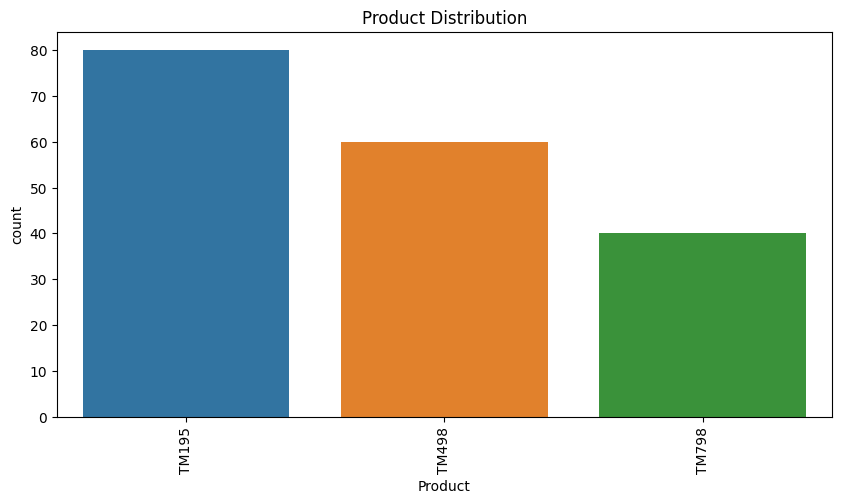

In [40]:
univariate_plot('Product')

### Age

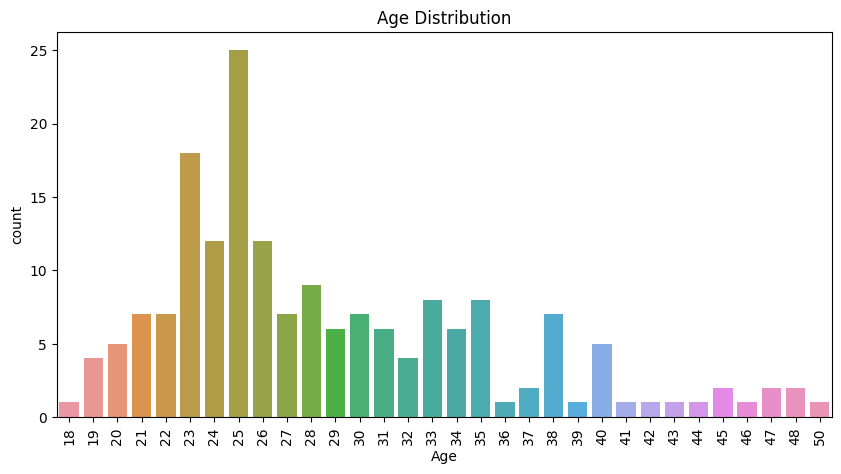

In [41]:
univariate_plot('Age')

In [42]:
# fig = px.box(data_frame = data, x = "Age")

# fig.show()

In [43]:
# sns.boxplot(data = data, x = "Age");

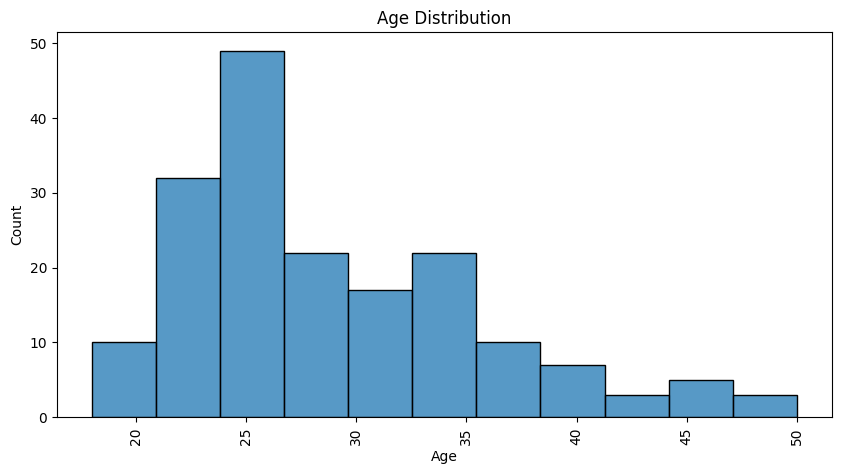

In [44]:
univariate_plot('Age', sns.histplot)

### Gender

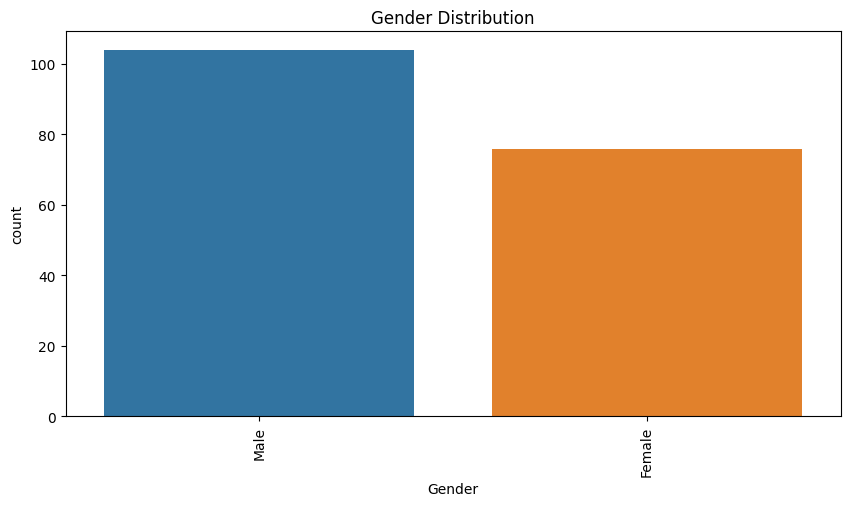

In [45]:
univariate_plot('Gender')

### Education

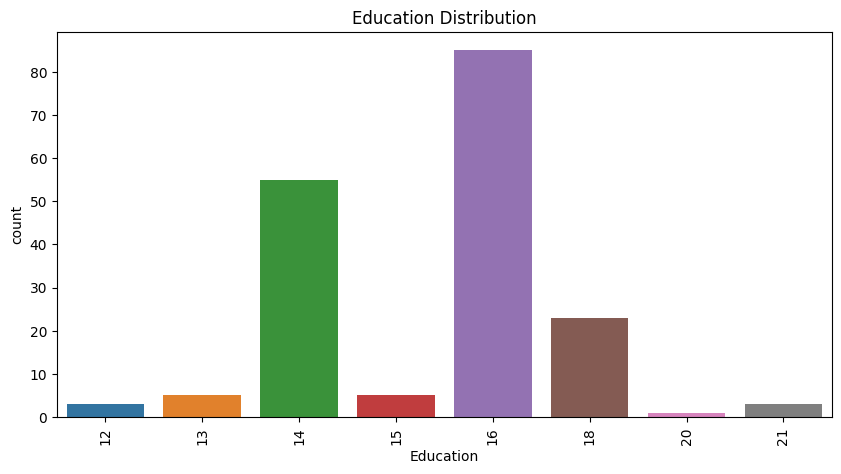

In [46]:
univariate_plot('Education')

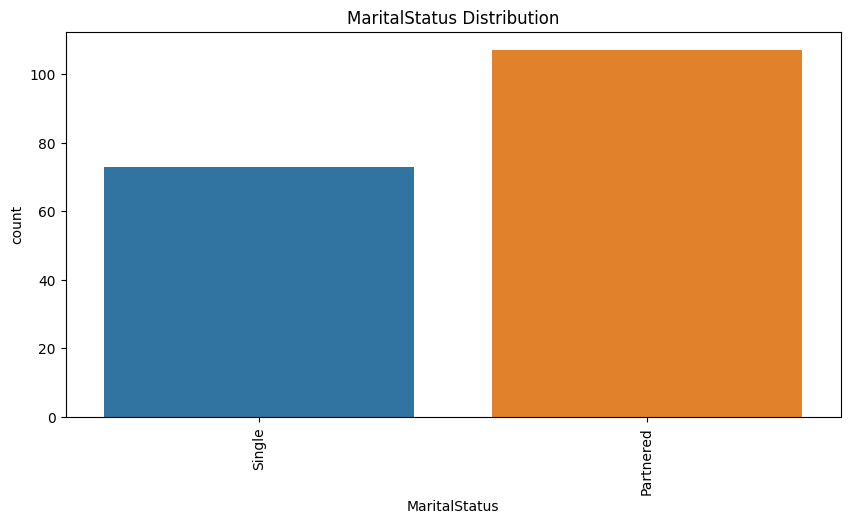

In [47]:
univariate_plot('MaritalStatus')

### Product Usage

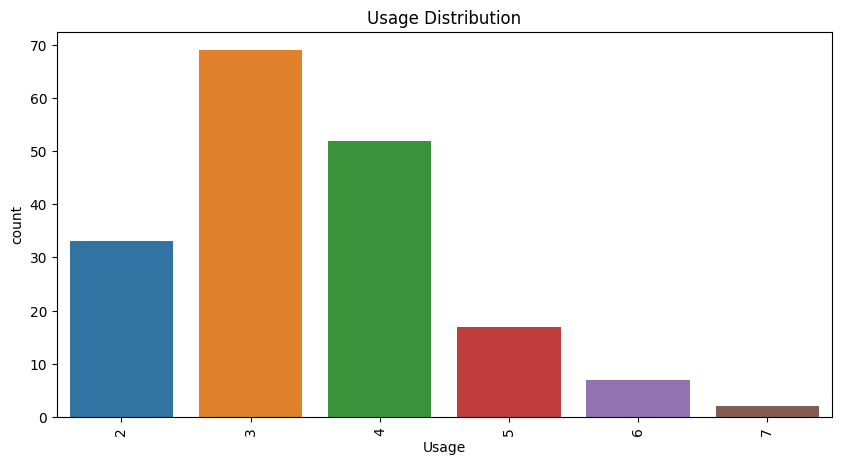

In [48]:
univariate_plot('Usage')

### Fitness Distribution

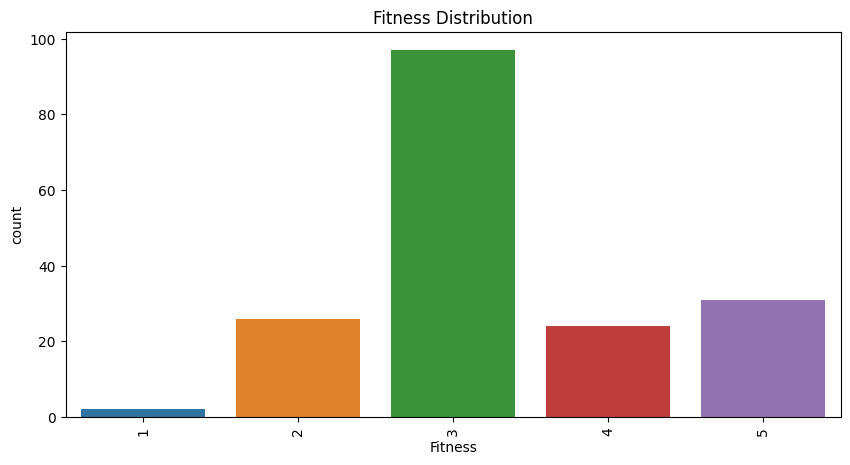

In [49]:
univariate_plot('Fitness')

### Income

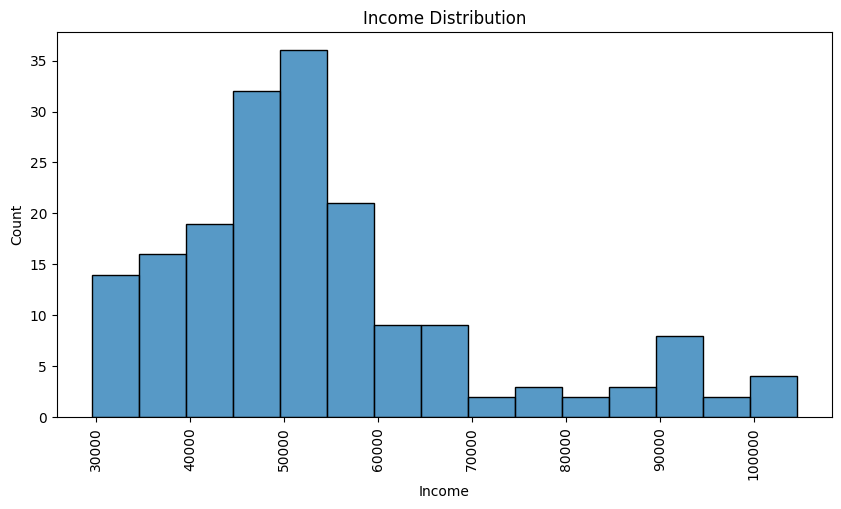

In [50]:
univariate_plot('Income', sns.histplot)

### Miles

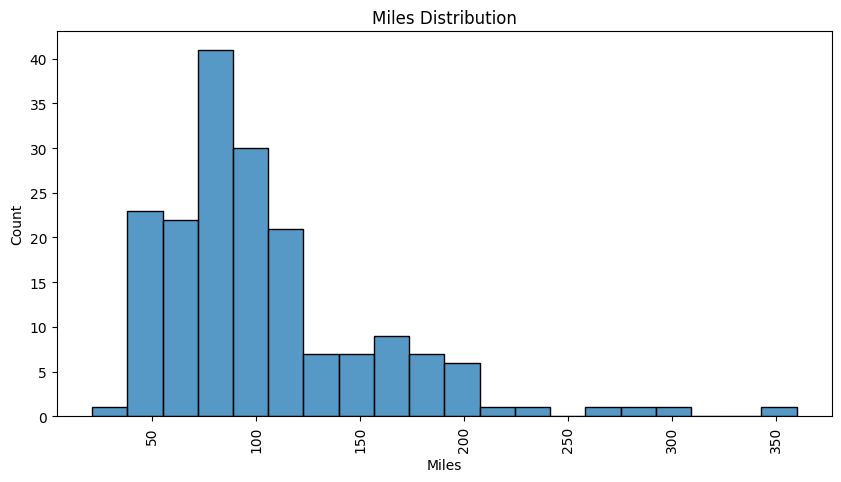

In [51]:
univariate_plot('Miles', sns.histplot)

In [52]:
df['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [53]:
df['Miles'].mode()[0]

85

### Multivariate Data Analysis

In [54]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


### Correlation

In [55]:
num_df = df.select_dtypes(exclude = 'object')

num_df

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47
...,...,...,...,...,...,...
175,40,21,6,5,83416,200
176,42,18,5,4,89641,200
177,45,16,5,5,90886,160
178,47,18,4,5,104581,120


In [56]:
num_df_corr = num_df.corr()

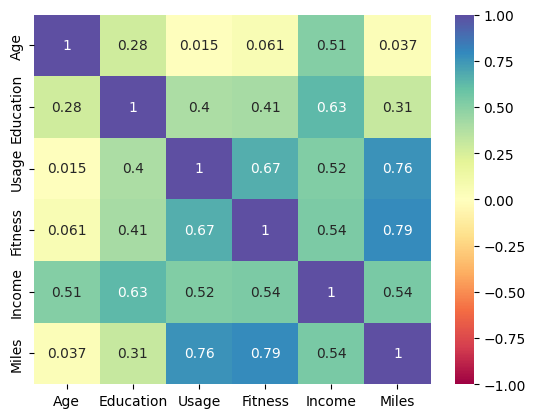

In [57]:
# Creating correlation plot (heat map)

plt.figure(dpi=100)
sns.heatmap(data = num_df_corr, vmin = -1, vmax = 1, cmap = 'Spectral', annot = True);

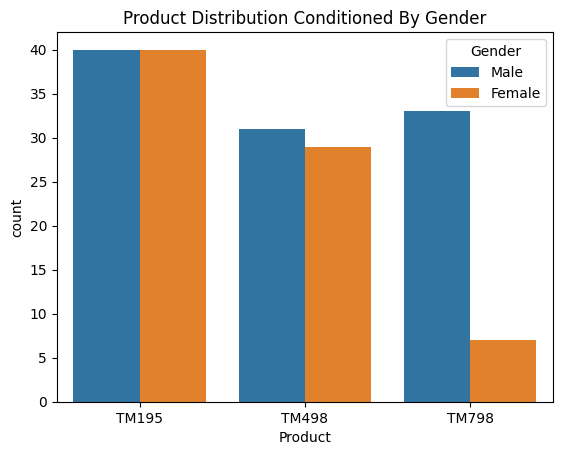

In [58]:
sns.countplot(data=df, x='Product', hue='Gender')
plt.title('Product Distribution Conditioned By Gender');

In [59]:
# sns.countplot(data = data, x = "Product", hue ='Gender');
# plt.ylabel("Frequency")
# plt.title("Distribution of Product")
# # plt.show()

# plt.savefig("product_countplot.png")

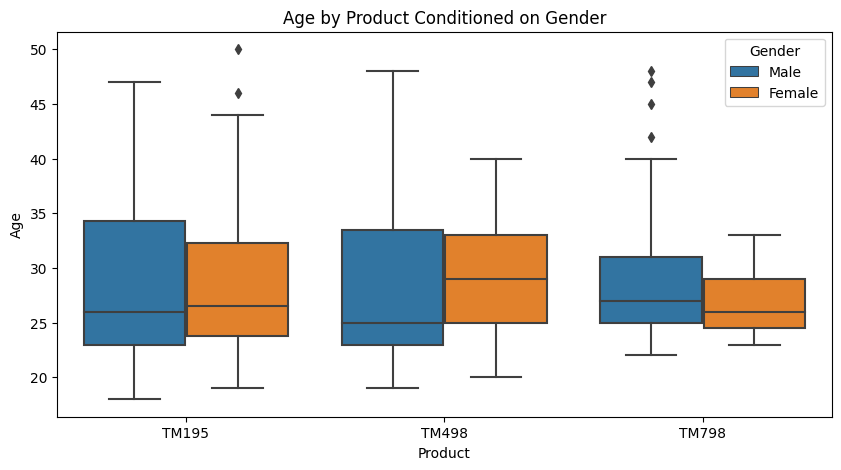

In [60]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Product', y='Age', hue='Gender')
plt.title('Age by Product Conditioned on Gender');

Text(0.5, 1.0, 'Income Against Product')

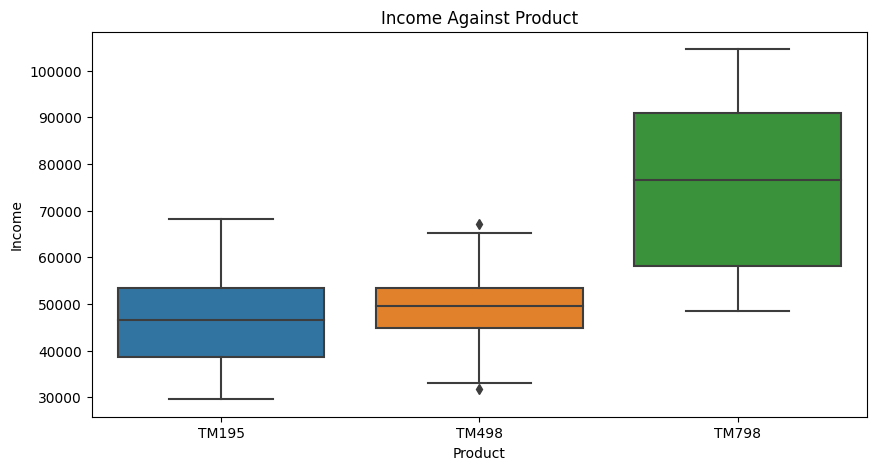

In [61]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Product', y='Income')
plt.title('Income Against Product')

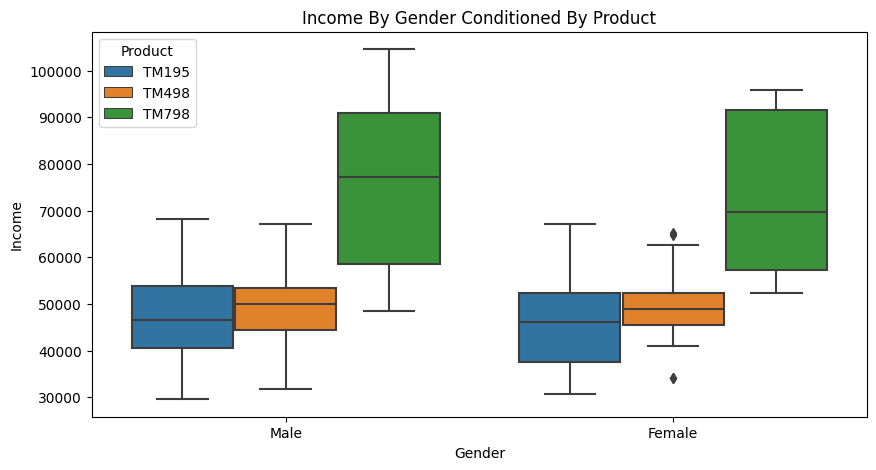

In [62]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Gender', y='Income', hue='Product')
plt.title('Income By Gender Conditioned By Product');

Text(0.5, 1.0, 'Product Against Education')

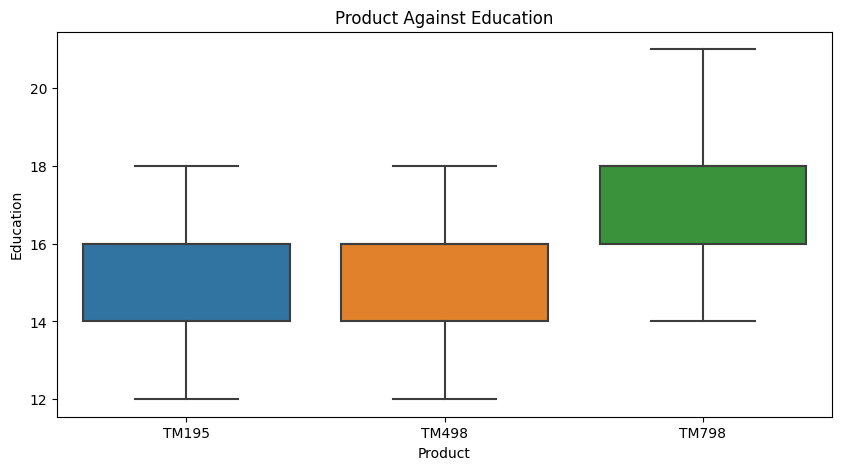

In [63]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Product', y='Education')
plt.title('Product Against Education')

Text(0.5, 1.0, 'Product Against Miles')

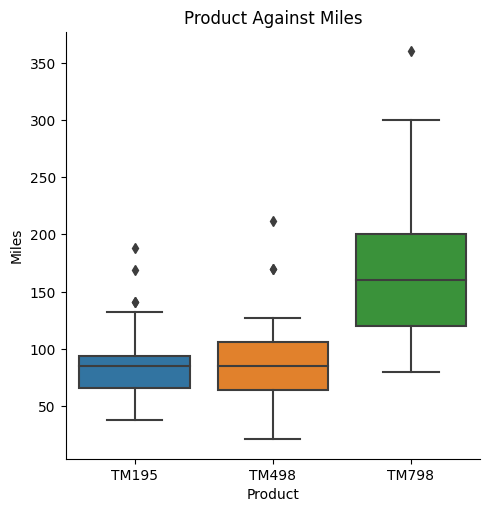

In [64]:
# Using side by side boxplot for a categorical plot ... Product vs Miles

sns.catplot(data = df, x='Product', y='Miles', kind='box');
plt.title('Product Against Miles')

Text(0.5, 1.0, 'Product Against Usage')

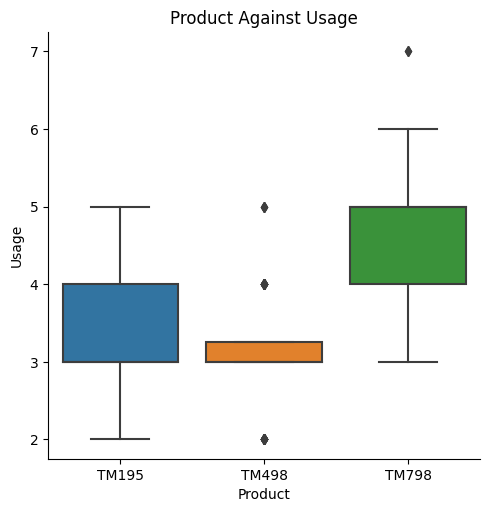

In [65]:
# Categorical plot for Product vs Usage

sns.catplot(data=df, x='Product', y='Usage', kind='box');
plt.title('Product Against Usage')

Text(0.5, 1.0, 'Product Against Fitness')

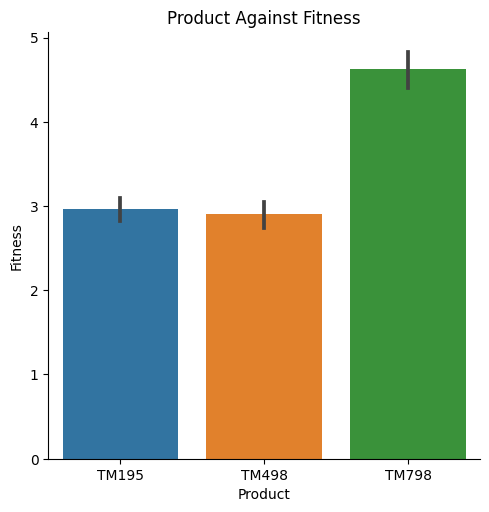

In [66]:
# Product vs Fitness

sns.catplot(data= df, x = 'Product', y = 'Fitness', kind='bar');

plt.title('Product Against Fitness')

Text(0.5, 1.0, 'Product Against Income')

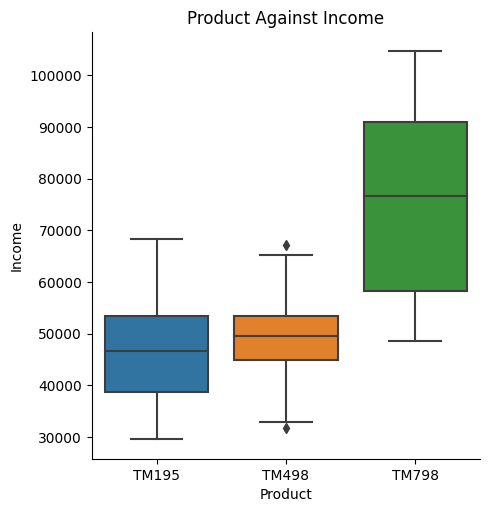

In [67]:
#Product vs Income

sns.catplot(data = df, x = 'Product', y = 'Income', kind='box');

plt.title('Product Against Income')

### Insights and Recommendations